# Identifying quiet stars for injection and recovery.

In [2]:
%matplotlib inline

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import eleanor
from tess_stars2px import tess_stars2px_function_entry

import warnings
warnings.filterwarnings('ignore')

In [49]:
north = pd.read_csv("../../data/cvz_north_16th.csv")
south = pd.read_csv("../../data/cvz_south_16th.csv")
south.head()

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,115) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,...,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
0,167206224,20190415,NaN,9181-00746-1,100-016808,06292752-7008241,NaN,J062927.49-700824.0,NaN,33619221.0,...,NaN,823.188000,823.188000,97.364479,-70.139981,823.188000,823.188000,1,0,564827970
1,41232141,20190415,NaN,8905-01180-1,120-009587,06062568-6605087,NaN,J060625.70-660509.1,NaN,32457365.0,...,NaN,0.001263,0.001750,91.607136,-66.085916,0.001263,0.001750,1,0,557987638
2,150391195,20190415,NaN,8898-00822-1,135-008332,06263815-6309037,NaN,J062638.17-630903.7,NaN,29872455.0,...,NaN,0.130739,0.358968,96.658745,-63.151211,0.130739,0.358968,1,0,564150288
3,260537234,20190415,NaN,NaN,158-008025,06271545-5835027,NaN,J062715.45-583502.6,NaN,27298706.0,...,NaN,2.043550,2.550863,96.814505,-58.584228,2.043550,2.550863,1,0,564191467
4,260239249,20190415,NaN,8533-01044-1,156-007177,06130821-5857405,NaN,J061308.22-585740.3,NaN,27286238.0,...,NaN,60.000000,60.000000,93.284222,-58.961262,60.000000,60.000000,0,0,559854550


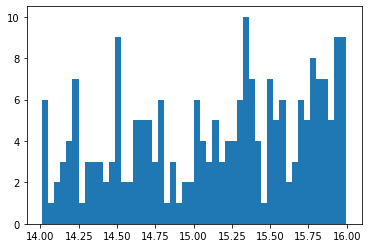

In [138]:
F = (6500 < south.Teff.values) & (south.Teff.values < 6600) & (south.logg > 4.4) & (south.logg < 4.5) & (south.Tmag > 14)
plt.hist(south.Tmag.values[F], 50);

220

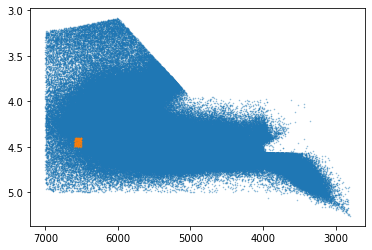

In [139]:
plt.plot(south.Teff.values, south.logg.values, ".", alpha=.5, ms=1)
plt.plot(south.Teff.values[F], south.logg.values[F], ".", alpha=.5, ms=1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
sum(F)

In [211]:
i = 10

ra = south.ra.values[F][i]
dec = south.dec.values[F][i]
ticid = south.ID.values[F][i]

outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
    tess_stars2px_function_entry(ticid, ra, dec)
print(outID[i])
print(outSec, "\n")

350026973
[ 1  2  3  4  5  7  8  9 10 11 12 13 27 28 29 30 31 32 33 34 35 36 37 38
 39] 



In [212]:
star = eleanor.Source(tic=south.ID.values[F][i], sector=1)

In [213]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

100%|██████████| 1282/1282 [00:17<00:00, 73.03it/s]


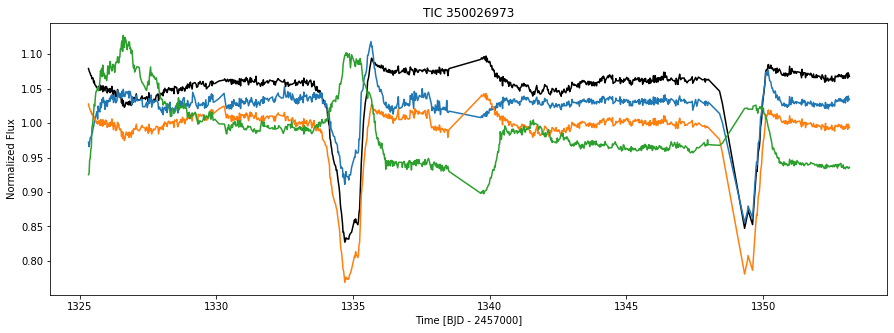

In [214]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03)
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]))
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('TIC {}'.format(ticid));

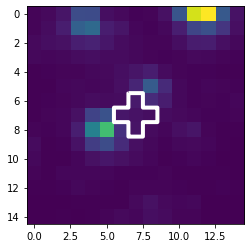

In [215]:
vis = eleanor.Visualize(data)
vis.aperture_contour();

In [216]:
print(ticid)

350026973


In [217]:
print(south.Tmag.values[F][i])

15.347399711608901


In [ ]:
quiet_stars = [272322770, 272429282, 306469159, 382627020, 300743216, 271724760]
indices = [1, 2, 3, 8, 11, 12]
quiet_stars_faint = [306469159, 382627020, 358459430, 300744010]
indices_faint = [0, 4, 7, 8]

In [ ]:
i = 5
for i in range(6, sum(F)):

    ra = south.ra.values[F][i]
    dec = south.dec.values[F][i]
    ticid = south.ID.values[F][i]

    outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
        tess_stars2px_function_entry(ticid, ra, dec)
    print(outID[i])
    print(outSec, "\n")
    star = eleanor.Source(tic=south.ID.values[F][i], sector=1)
    data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)
    
    plt.figure(figsize=(15,5))

    q = data.quality == 0

    plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
    plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03)
    plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]))
    plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02)
    plt.ylabel('Normalized Flux')
    plt.xlabel('Time [BJD - 2457000]')
    plt.title('TIC {}'.format(ticid));
    plt.savefig("../plots/{}_lc_eleanor".format(ticid))
    plt.close()

    vis = eleanor.Visualize(data)
    fig = vis.aperture_contour();
    plt.savefig("../plots/{}_aperture".format(ticid))